### Import modules

In [1]:
import networkx as nx
import graph_bandit_RL
from graph_bandit_helper_tools import *
np.random.seed(1)
from known_rewards_helper_functions import get_Q_table,get_paths

%load_ext autoreload
%autoreload 2

In [18]:
def graph_get_policy(G_in,means):
    G = G_in.copy()
    
    sorted_mean = np.sort(list(set(means)))
    assert(len(sorted_mean)>=2)
    Delta = sorted_mean[-1]-sorted_mean[-2]
    D = nx.diameter(G)
    mu_star = np.max(means)
    Q,n_iter,n_calls=get_Q_table(G, means, T=D*mu_star/Delta)
    
    policy = {}
    for s in G:
        neighbors = [_ for _ in G.neighbors(s)]
        neighbor_cost = [Q[s,nb] for nb in neighbors]
        policy[s] = neighbors[np.argmax(neighbor_cost)]
    return policy,n_calls,n_iter

In [69]:
def DP_get_policy(G_cyc,means):
    G = G_cyc.copy()
    G.remove_edges_from(nx.selfloop_edges(G_cyc))

    # Assume no self-loops in this setting.
    # cost at s: g(s)= mu*-mu(s)
    # C(s,T) = min_{length<=T simple path(no loops) starting at s ending s*} \sum_t g(s_t) =  \min{C(s,T-1), \min_{w in N_s} g(w)+C(w,T-1)}
    # C(s*,0) = 0, C(v,0) = +inf if v!=s*.

    mu_star = np.max(means)
    s_star = np.argmax(means)

    g = mu_star - means

    n_nodes = G.number_of_nodes()

    C0 = np.ones(n_nodes)*np.inf

    C0[s_star] = 0

    Cs = [C0]

    # Value iteration for acyclic all-to-all weighted shortest path.
    n_calls = 0
    while True:
        C = np.zeros(n_nodes)

        for s in G:
            n_calls+=1
            C[s] = np.min([Cs[-1][w]+g[w] for w in G.neighbors(s)]+[Cs[-1][s]])

        if np.all(C==Cs[-1]):
            break
        Cs.append(C)

    C = Cs[-1]

    # print(len(Cs))

    policy = {}

    # Compute the optimal policy from the cost table.
    for s in G:
        if not s==s_star:
            neighbors = [_ for _ in G.neighbors(s)]
            neighbor_total_cost = [g[nb]+C[nb] for nb in neighbors]
            policy[s] = neighbors[np.argmin(neighbor_total_cost)]
        else:
            policy[s] = s
    return policy,n_calls,len(Cs)

In [20]:
def dict_to_array(dic):
    a = np.zeros(len(dic))
    for key, val in dic.items():
        a[key]=val
    return a

# Line Graph

In [100]:
node_num = range(2,20,2)

G_compute = []
DP_compute = []

for n in node_num:
    np.random.seed(773)
    means = np.random.rand(n)
    means[0]=0.99
    means[-1]=1
    G = return_graph('line',n)
    # G = nx.erdos_renyi_graph(n,0.5)

    pol1,nG,G_iter = graph_get_policy(G,means)
    
    G_compute.append(nG)

    pol2,nDP,DP_iter = DP_get_policy(G,means)
    
    assert(np.all(dict_to_array(pol1)-dict_to_array(pol2)==0))
    DP_compute.append(nDP)
    
    print(n,G_iter,DP_iter)

2 2 2
4 4 4
6 6 6
8 8 8
10 10 10
12 12 12
14 14 14
16 16 16
18 18 18


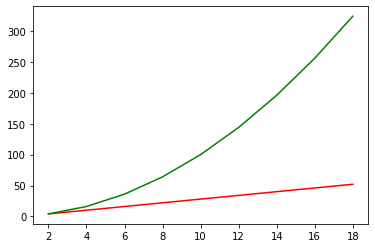

In [101]:
plt.plot(node_num,G_compute,color='red')

plt.plot(node_num,DP_compute,color = 'green')

# Star Graph

In [98]:
node_num = range(2,20,2)

G_compute = []
DP_compute = []

for n in node_num:
    np.random.seed(773)
    means = np.random.rand(n)
    means[0]=0.99
    means[-1]=1
    G = return_graph('star',n)
    # G = nx.erdos_renyi_graph(n,0.5)

    pol1,nG,G_iter = graph_get_policy(G,means)
    
    G_compute.append(nG)

    pol2,nDP,DP_iter = DP_get_policy(G,means)
    
    assert(np.all(dict_to_array(pol1)-dict_to_array(pol2)==0))
    DP_compute.append(nDP)
    
    print(n,G_iter,DP_iter)

2 2 2
4 3 3
6 3 3
8 3 3
10 3 3
12 3 3
14 3 3
16 3 3
18 3 3


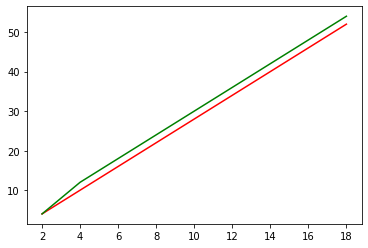

In [99]:
plt.plot(node_num,G_compute,color='red')

plt.plot(node_num,DP_compute,color = 'green')

# Fully-Connected Graph

In [96]:
node_num = range(2,20,2)

G_compute = []
DP_compute = []

for n in node_num:
    np.random.seed(773)
    means = np.random.rand(n)
    means[0]=0.99
    means[-1]=1
    G = return_graph('fully_connected',n)
    # G = nx.erdos_renyi_graph(n,0.5)

    pol1,nG,G_iter = graph_get_policy(G,means)
    
    G_compute.append(nG)

    pol2,nDP,DP_iter = DP_get_policy(G,means)
    
    assert(np.all(dict_to_array(pol1)-dict_to_array(pol2)==0))
    DP_compute.append(nDP)
    
    print(n,G_iter,DP_iter)

2 2 2
4 2 2
6 2 2
8 2 2
10 2 2
12 2 2
14 2 2
16 2 2
18 2 2


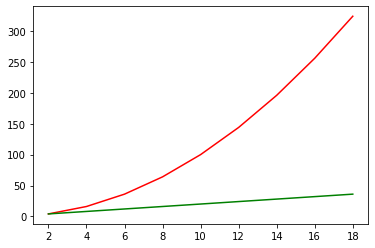

In [97]:
plt.plot(node_num,G_compute,color='red')

plt.plot(node_num,DP_compute,color = 'green')

# Circle Graph

In [94]:
node_num = range(2,20,2)

G_compute = []
DP_compute = []

for n in node_num:
    np.random.seed(773)
    means = np.random.rand(n)
    means[0]=0.99
    means[-1]=1
    G = return_graph('circle',n)
    # G = nx.erdos_renyi_graph(n,0.5)

    pol1,nG,G_iter = graph_get_policy(G,means)
    
    G_compute.append(nG)

    pol2,nDP,DP_iter = DP_get_policy(G,means)
    
    assert(np.all(dict_to_array(pol1)-dict_to_array(pol2)==0))
    DP_compute.append(nDP)
    
    print(n,G_iter,DP_iter)

2 2 2
4 3 3
6 5 5
8 5 5
10 6 6
12 7 7
14 9 9
16 11 11
18 11 11


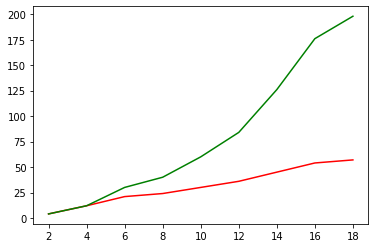

In [95]:
plt.plot(node_num,G_compute,color='red')

plt.plot(node_num,DP_compute,color = 'green')

# Tree Graph

In [126]:
node_num = [2,4,6,8,10,12,14,16,18]
n_children = 4

G_compute = []
DP_compute = []

for n in node_num:
    np.random.seed(773)
    means = np.random.rand(n)
    means[0]=0.99
    means[-1]=1
    G = return_graph('tree',n,n_children)
    # G = nx.erdos_renyi_graph(n,0.5)

    pol1,nG,G_iter = graph_get_policy(G,means)
    
    G_compute.append(nG)

    pol2,nDP,DP_iter = DP_get_policy(G,means)
    
    assert(np.all(dict_to_array(pol1)-dict_to_array(pol2)==0))
    DP_compute.append(nDP)
    
    print(n,G_iter,DP_iter)

2 2 2
4 3 3
6 4 4
8 4 4
10 5 5
12 5 5
14 5 5
16 5 5
18 5 5


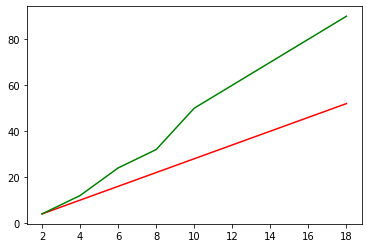

In [127]:
plt.plot(node_num,G_compute,color='red')

plt.plot(node_num,DP_compute,color = 'green')

# The Q-graph algorithm has an advantge when the degree of the graph is low.

In [102]:
# ds = [2,4,6,8,10]
# n = 10
# rep = 20

# np.random.seed(773)
# means = np.random.rand(n)
# means[0]=0.99
# means[-1]=1

# G_ave_compute = []
# DP_ave_compute = []
# for d in ds:
#     G_compute = []
#     DP_compute = []
#     for _ in range(rep):
        
#         G = nx.random_regular_graph(n=n,d=d)

#         pol1,nG,G_iter = graph_get_policy(G,means)

#         G_compute.append(nG)

#         pol2,nDP,DP_iter = DP_get_policy(G,means)

#         DP_compute.append(nDP)
        
#     G_ave_compute.append(np.mean(G_compute))
#     DP_ave_compute.append(np.mean(DP_compute))